# Tokenizing

In [1584]:
import json

with open('1_scrapping_black_clover.json', 'r') as openfile:
    eps_summary = json.load(openfile)

In [1585]:
eps_summary[0]

"In Hage, a priest finds two babies abandoned outside his church. He takes them inside and discovers their names to be Yuno and Asta.\nFifteen years later, Asta proposes to Sister Lily, who refuses repeatedly. Yuno and the other orphans criticize Asta and point out his lack of magic. Asta tries to show off his skills, but Yuno outshines him with his magic.\nLater, at the Grimoire Acceptance Ceremony, a pair of nobles criticize the commoners there. Despite Asta not receiving a grimoire while Yuno attains a four-leaf clover one, Asta challenges Yuno to the title of Magic Emperor, but Yuno ignores him.\nAfter the ceremony, the two nobles ambush Yuno outside the tower, but Yuno overpowers them. All three are then ambushed by Revchi Salik, a former Magic Knight who plans to steal Yuno's grimoire and sell it. Asta comes to Yuno's rescue but fails.\nAs Revchi breaks Asta's spirit, Yuno calls Asta his rival. Motivated by this acknowledgment, Asta decides to keep fighting, which summons a grimo

## Tokenizing with Regular Expressions

In [1586]:
import re

In [1587]:
def tokenize_regrex(text):
    tokens = re.split(r"[ \n,.\"]+", text)
    tokens.remove('')
    return tokens

In [1588]:
def tokenize_regrex_corpus(corpus):
    tokens = []
    for doc in corpus:
        tokens.extend(tokenize_regrex(doc))
    return tokens

In [1589]:
regrex_tokens = tokenize_regrex(eps_summary[0])
print(regrex_tokens)

['In', 'Hage', 'a', 'priest', 'finds', 'two', 'babies', 'abandoned', 'outside', 'his', 'church', 'He', 'takes', 'them', 'inside', 'and', 'discovers', 'their', 'names', 'to', 'be', 'Yuno', 'and', 'Asta', 'Fifteen', 'years', 'later', 'Asta', 'proposes', 'to', 'Sister', 'Lily', 'who', 'refuses', 'repeatedly', 'Yuno', 'and', 'the', 'other', 'orphans', 'criticize', 'Asta', 'and', 'point', 'out', 'his', 'lack', 'of', 'magic', 'Asta', 'tries', 'to', 'show', 'off', 'his', 'skills', 'but', 'Yuno', 'outshines', 'him', 'with', 'his', 'magic', 'Later', 'at', 'the', 'Grimoire', 'Acceptance', 'Ceremony', 'a', 'pair', 'of', 'nobles', 'criticize', 'the', 'commoners', 'there', 'Despite', 'Asta', 'not', 'receiving', 'a', 'grimoire', 'while', 'Yuno', 'attains', 'a', 'four-leaf', 'clover', 'one', 'Asta', 'challenges', 'Yuno', 'to', 'the', 'title', 'of', 'Magic', 'Emperor', 'but', 'Yuno', 'ignores', 'him', 'After', 'the', 'ceremony', 'the', 'two', 'nobles', 'ambush', 'Yuno', 'outside', 'the', 'tower', 'but

In [1590]:
regrex_tokens = tokenize_regrex_corpus(eps_summary)

In [1591]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [1592]:
def generate_wordcloud_color(stoplist, frequencies):
    wordcloud = WordCloud(stopwords=stoplist, collocations=False, colormap='viridis', width=1080, height=768).generate_from_frequencies(frequencies)
    return wordcloud

In [1593]:
def generate_wordcloud_color_no_ranks(stoplist, frequencies):
    wordcloud = WordCloud(stopwords=stoplist, collocations=False, colormap='viridis', relative_scaling=1, min_font_size=50, max_font_size=50, width=1080, height=768).generate_from_frequencies(frequencies)
    return wordcloud

In [1594]:
def generate_wordcloud_monocolor(stoplist, frequencies):
    wordcloud = WordCloud(stopwords=stoplist, color_func=(lambda word, **kwargs: "white"), collocations=False, colormap='viridis', width=1080, height=768).generate_from_frequencies(frequencies)
    return wordcloud

In [1595]:
def graph_wordcloud(wordcloud):
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [1596]:
import pandas as pd

regrex_tokens_as_series = pd.Series(regrex_tokens)

In [1597]:
def pandas_tokenize_drop_many(tokenized, to_drop):
    for dropping in to_drop:
        tokenized = tokenized.drop(tokenized[tokenized == dropping].index)
    return tokenized

### Most Mentioned Words

In [1598]:
regrex_tokens_as_series.value_counts().head(10)

the     4098
to      3128
and     3093
that    2100
he      1270
is      1254
Asta    1248
of      1157
a       1144
him      934
dtype: int64

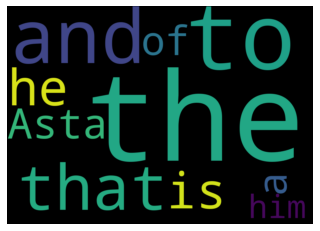

In [1599]:
graph_wordcloud(generate_wordcloud_color(None, regrex_tokens_as_series.value_counts().head(10)))

In [1600]:
to_drop = ["the", "to", "and", "that", "he", "is", "of", "a", "him"]
regrex_tokens_as_series = pandas_tokenize_drop_many(regrex_tokens_as_series, to_drop)

In [1601]:
regrex_tokens_as_series.value_counts().head(10)

Asta     1248
his       909
her       806
they      771
but       719
them      680
with      632
in        625
she       575
Magic     571
dtype: int64

In [1602]:
to_drop = ["his", "her", "they", "but", "them", "in", "she", "with"]
regrex_tokens_as_series = pandas_tokenize_drop_many(regrex_tokens_as_series, to_drop)

In [1603]:
regrex_tokens_as_series.value_counts().head(10)

Asta     1248
Magic     571
it        534
for       528
not       504
tells     477
as        455
are       454
Yami      437
magic     391
dtype: int64

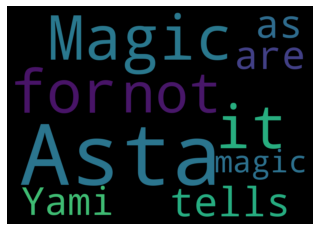

In [1604]:
graph_wordcloud(generate_wordcloud_color(None, regrex_tokens_as_series.value_counts().head(10)))

In [1605]:
print(regrex_tokens_as_series[regrex_tokens_as_series == "Magic"].value_counts())
print()
print(regrex_tokens_as_series[regrex_tokens_as_series == "magic"].value_counts())

Magic    571
dtype: int64

magic    391
dtype: int64


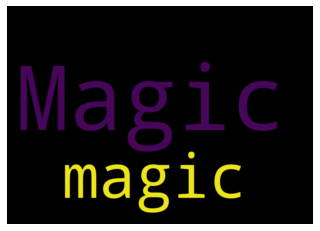

In [1606]:
graph_wordcloud(generate_wordcloud_color(None, pd.concat([regrex_tokens_as_series[regrex_tokens_as_series == "Magic"], regrex_tokens_as_series[regrex_tokens_as_series == "magic"]]).value_counts()))

### Most Mentioned Characters

In [1607]:
to_drop = ["it", "for", "not", "tells", "as", "are", "on", "their", "The", "was", "be", "about", "will", "by", "from", "at", "has"
            , "up", "out", "He", "asks", "have", "who", "says", "if", "how", "so", "can", "all", "back", "into", "Magic", "magic"
            , "attack", "Black", "Knights", "which", "because", "one", "what", "then", "Kingdom", "other", "She", "go", "get", "while"
            , "had", "this", "going", "does"]
regrex_tokens_as_series = pandas_tokenize_drop_many(regrex_tokens_as_series, to_drop)

In [1608]:
regrex_tokens_as_series.value_counts().head(11)

Asta       1248
Yami        437
Noelle      388
Yuno        379
Julius      245
Finral      197
Licht       194
Vanessa     160
Magna       157
Gauche      134
Fanzell     134
dtype: int64

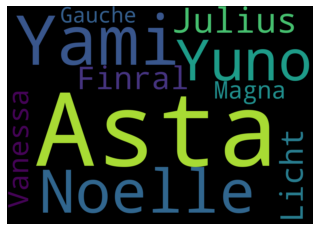

In [1609]:
graph_wordcloud(generate_wordcloud_color(None, regrex_tokens_as_series.value_counts().head(10)))

In [1610]:
regrex_tokens_lower = list(map(lambda x : x.lower(), regrex_tokens))

In [1611]:
regrex_tokens_as_series_lowered = pd.Series(regrex_tokens_lower)

In [1612]:
regrex_tokens_as_series_lowered.value_counts().head(10)

the      4430
to       3135
and      3093
that     2114
he       1536
is       1254
asta     1248
a        1175
of       1157
magic     962
dtype: int64

### Diversity / Pronoun Analysis

In [1613]:
print(regrex_tokens_as_series_lowered[regrex_tokens_as_series_lowered == "he"].value_counts())
print()

print(regrex_tokens_as_series_lowered[regrex_tokens_as_series_lowered == "she"].value_counts())
print()

he    1536
dtype: int64

she    723
dtype: int64



In [1614]:
subject_pronouns = pd.concat([regrex_tokens_as_series_lowered[regrex_tokens_as_series_lowered == "he"], regrex_tokens_as_series_lowered[regrex_tokens_as_series_lowered == "she"]])

In [1615]:
print((regrex_tokens_as_series_lowered[(regrex_tokens_as_series_lowered == "him") | (regrex_tokens_as_series_lowered == "his") | (regrex_tokens_as_series_lowered == "himself")].value_counts()))
print()

print(regrex_tokens_as_series_lowered[(regrex_tokens_as_series_lowered == "her") | (regrex_tokens_as_series_lowered == "herself")].value_counts())
print()

print(regrex_tokens_as_series_lowered[(regrex_tokens_as_series_lowered == "they") | (regrex_tokens_as_series_lowered == "them") | (regrex_tokens_as_series_lowered == "their") 
        | (regrex_tokens_as_series_lowered == "theirs") | (regrex_tokens_as_series_lowered == "themselves")].value_counts())
print()

him        934
his        915
himself     89
dtype: int64

her        808
herself     33
dtype: int64

they          880
them          680
their         376
themselves     25
theirs          1
dtype: int64



In [1616]:
other_pronouns = regrex_tokens_as_series_lowered[(regrex_tokens_as_series_lowered == "him") | (regrex_tokens_as_series_lowered == "his") | (regrex_tokens_as_series_lowered == "himself")]
other_pronouns = pd.concat([other_pronouns, regrex_tokens_as_series_lowered[(regrex_tokens_as_series_lowered == "her") | (regrex_tokens_as_series_lowered == "herself")]])
other_pronouns = pd.concat([other_pronouns, regrex_tokens_as_series_lowered[(regrex_tokens_as_series_lowered == "they") | (regrex_tokens_as_series_lowered == "them") | (regrex_tokens_as_series_lowered == "their") 
        | (regrex_tokens_as_series_lowered == "theirs") | (regrex_tokens_as_series_lowered == "themselves")]])
other_pronouns.value_counts()

him           934
his           915
they          880
her           808
them          680
their         376
himself        89
herself        33
themselves     25
theirs          1
dtype: int64

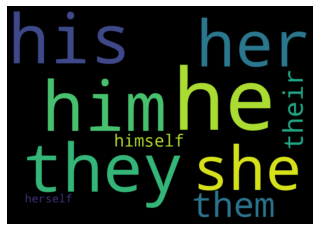

In [1617]:
graph_wordcloud(generate_wordcloud_color(None, pd.concat([subject_pronouns, other_pronouns]).value_counts().head(10)))

### Most Frequent Non-Character Words

In [1618]:
regrex_tokens_as_series_lowered.value_counts().head(10)

the      4430
to       3135
and      3093
that     2114
he       1536
is       1254
asta     1248
a        1175
of       1157
magic     962
dtype: int64

In [1619]:
to_drop = ["the", "to", "and", "that", "he", "is", "asta", "a", "of", "him", "his", "they", "her", "but", "she", "in", "them", "with"
            , "it", "as", "for", "not", "tells", "are", "yami", "noelle", "on", "yuno", "their", "was", "be", "at", "about", "will", "by"
            , "from", "has", "up", "out", "asks", "julius", "have", "who", "says", "if", "how", "so", "finral", "can", "back", "licht"
            , "black", "all", "while", "which", "because", "after", "into", "this", "when", "vanessa", "magna", "then", "what", "other"
            , "go", "get", "had", "going", "gauche", "does", "fanzell", "through", "uses", "there", "do", "an", "being", "vetto"
            , "tries", "would", "down", "more", "silva", "no", "gets", "cannot", "even", "charlotte", "fuegoleon", "also", "off", "before"
            , "were", "take", "been", "vermillion", "luck"]
regrex_tokens_as_series_lowered = pandas_tokenize_drop_many(regrex_tokens_as_series_lowered, to_drop)
regrex_tokens_as_series_lowered.value_counts().head(10)

magic      962
kingdom    185
knights    185
attack     175
one        167
mana       118
time       116
help       114
sword      113
bulls      112
dtype: int64

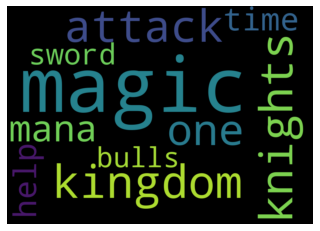

In [1620]:
graph_wordcloud(generate_wordcloud_color(None, regrex_tokens_as_series_lowered.value_counts().head(10)))

## Tokenizing with NLTK

In [1621]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/pauli/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [1622]:
from nltk import word_tokenize
from nltk import sent_tokenize

In [1623]:
sent = sent_tokenize(eps_summary[0])
sent

['In Hage, a priest finds two babies abandoned outside his church.',
 'He takes them inside and discovers their names to be Yuno and Asta.',
 'Fifteen years later, Asta proposes to Sister Lily, who refuses repeatedly.',
 'Yuno and the other orphans criticize Asta and point out his lack of magic.',
 'Asta tries to show off his skills, but Yuno outshines him with his magic.',
 'Later, at the Grimoire Acceptance Ceremony, a pair of nobles criticize the commoners there.',
 'Despite Asta not receiving a grimoire while Yuno attains a four-leaf clover one, Asta challenges Yuno to the title of Magic Emperor, but Yuno ignores him.',
 'After the ceremony, the two nobles ambush Yuno outside the tower, but Yuno overpowers them.',
 "All three are then ambushed by Revchi Salik, a former Magic Knight who plans to steal Yuno's grimoire and sell it.",
 "Asta comes to Yuno's rescue but fails.",
 "As Revchi breaks Asta's spirit, Yuno calls Asta his rival.",
 'Motivated by this acknowledgment, Asta decide

In [1624]:
for p in sent:
    print(word_tokenize(p))

['In', 'Hage', ',', 'a', 'priest', 'finds', 'two', 'babies', 'abandoned', 'outside', 'his', 'church', '.']
['He', 'takes', 'them', 'inside', 'and', 'discovers', 'their', 'names', 'to', 'be', 'Yuno', 'and', 'Asta', '.']
['Fifteen', 'years', 'later', ',', 'Asta', 'proposes', 'to', 'Sister', 'Lily', ',', 'who', 'refuses', 'repeatedly', '.']
['Yuno', 'and', 'the', 'other', 'orphans', 'criticize', 'Asta', 'and', 'point', 'out', 'his', 'lack', 'of', 'magic', '.']
['Asta', 'tries', 'to', 'show', 'off', 'his', 'skills', ',', 'but', 'Yuno', 'outshines', 'him', 'with', 'his', 'magic', '.']
['Later', ',', 'at', 'the', 'Grimoire', 'Acceptance', 'Ceremony', ',', 'a', 'pair', 'of', 'nobles', 'criticize', 'the', 'commoners', 'there', '.']
['Despite', 'Asta', 'not', 'receiving', 'a', 'grimoire', 'while', 'Yuno', 'attains', 'a', 'four-leaf', 'clover', 'one', ',', 'Asta', 'challenges', 'Yuno', 'to', 'the', 'title', 'of', 'Magic', 'Emperor', ',', 'but', 'Yuno', 'ignores', 'him', '.']
['After', 'the', 'ce

In [1625]:
def tokenize_nltk(text):
    ps = sent_tokenize(text)
    tokens = []
    for p in ps:
        tokens.extend(word_tokenize(p))
    return tokens

In [1626]:
def tokenize_nltk_corpus(corpus):
    tokens = []
    for doc in corpus:
        tokens.extend(tokenize_nltk(doc))
    return tokens

In [1627]:
nltk_tokens = tokenize_nltk_corpus(eps_summary)
nltk_tokens

['In',
 'Hage',
 ',',
 'a',
 'priest',
 'finds',
 'two',
 'babies',
 'abandoned',
 'outside',
 'his',
 'church',
 '.',
 'He',
 'takes',
 'them',
 'inside',
 'and',
 'discovers',
 'their',
 'names',
 'to',
 'be',
 'Yuno',
 'and',
 'Asta',
 '.',
 'Fifteen',
 'years',
 'later',
 ',',
 'Asta',
 'proposes',
 'to',
 'Sister',
 'Lily',
 ',',
 'who',
 'refuses',
 'repeatedly',
 '.',
 'Yuno',
 'and',
 'the',
 'other',
 'orphans',
 'criticize',
 'Asta',
 'and',
 'point',
 'out',
 'his',
 'lack',
 'of',
 'magic',
 '.',
 'Asta',
 'tries',
 'to',
 'show',
 'off',
 'his',
 'skills',
 ',',
 'but',
 'Yuno',
 'outshines',
 'him',
 'with',
 'his',
 'magic',
 '.',
 'Later',
 ',',
 'at',
 'the',
 'Grimoire',
 'Acceptance',
 'Ceremony',
 ',',
 'a',
 'pair',
 'of',
 'nobles',
 'criticize',
 'the',
 'commoners',
 'there',
 '.',
 'Despite',
 'Asta',
 'not',
 'receiving',
 'a',
 'grimoire',
 'while',
 'Yuno',
 'attains',
 'a',
 'four-leaf',
 'clover',
 'one',
 ',',
 'Asta',
 'challenges',
 'Yuno',
 'to',
 'the

In [1628]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stoplist = stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/pauli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1629]:
stoplist

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [1630]:
words_lowered       = [token.lower() for token in nltk_tokens if token.isalpha() and token.lower() not in stoplist]
words_not_lowered   = [token for token in nltk_tokens if token.isalpha() and token.lower() not in stoplist]

In [1631]:
print(len(words_lowered), len(words_not_lowered))

42243 42243


In [1632]:
words_as_series_lowered     = pd.Series(words_lowered)
words_as_series_not_lowered = pd.Series(words_not_lowered)

### Not Lowered vs Lowered Tokens

#### Characters in Corpus

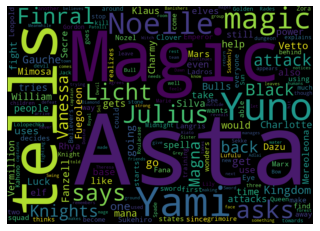

In [1633]:
graph_wordcloud(generate_wordcloud_color(stoplist, words_as_series_not_lowered.value_counts()))

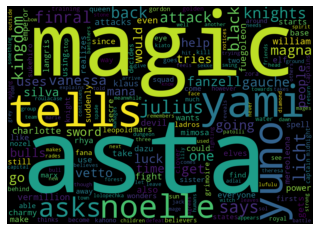

In [1634]:
graph_wordcloud(generate_wordcloud_color(stoplist, words_as_series_lowered.value_counts()))

In [1635]:
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/pauli/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /home/pauli/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [1636]:
tagged_nltk_tokens = nltk.pos_tag(nltk_tokens)
tagged_nltk_tokens

[('In', 'IN'),
 ('Hage', 'NNP'),
 (',', ','),
 ('a', 'DT'),
 ('priest', 'JJ'),
 ('finds', 'VBZ'),
 ('two', 'CD'),
 ('babies', 'NNS'),
 ('abandoned', 'VBD'),
 ('outside', 'IN'),
 ('his', 'PRP$'),
 ('church', 'NN'),
 ('.', '.'),
 ('He', 'PRP'),
 ('takes', 'VBZ'),
 ('them', 'PRP'),
 ('inside', 'RB'),
 ('and', 'CC'),
 ('discovers', 'NNS'),
 ('their', 'PRP$'),
 ('names', 'NNS'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('Yuno', 'NNP'),
 ('and', 'CC'),
 ('Asta', 'NNP'),
 ('.', '.'),
 ('Fifteen', 'CD'),
 ('years', 'NNS'),
 ('later', 'RB'),
 (',', ','),
 ('Asta', 'NNP'),
 ('proposes', 'VBZ'),
 ('to', 'TO'),
 ('Sister', 'NNP'),
 ('Lily', 'NNP'),
 (',', ','),
 ('who', 'WP'),
 ('refuses', 'VBZ'),
 ('repeatedly', 'RB'),
 ('.', '.'),
 ('Yuno', 'NNP'),
 ('and', 'CC'),
 ('the', 'DT'),
 ('other', 'JJ'),
 ('orphans', 'NNS'),
 ('criticize', 'VBP'),
 ('Asta', 'NNP'),
 ('and', 'CC'),
 ('point', 'NN'),
 ('out', 'RP'),
 ('his', 'PRP$'),
 ('lack', 'NN'),
 ('of', 'IN'),
 ('magic', 'NN'),
 ('.', '.'),
 ('Asta', 'NNP'),


In [1637]:
tagged_nltk_tokens_lowered = list(map(lambda x : (x[0].lower(), x[1]), tagged_nltk_tokens))
tagged_nltk_tokens_lowered

[('in', 'IN'),
 ('hage', 'NNP'),
 (',', ','),
 ('a', 'DT'),
 ('priest', 'JJ'),
 ('finds', 'VBZ'),
 ('two', 'CD'),
 ('babies', 'NNS'),
 ('abandoned', 'VBD'),
 ('outside', 'IN'),
 ('his', 'PRP$'),
 ('church', 'NN'),
 ('.', '.'),
 ('he', 'PRP'),
 ('takes', 'VBZ'),
 ('them', 'PRP'),
 ('inside', 'RB'),
 ('and', 'CC'),
 ('discovers', 'NNS'),
 ('their', 'PRP$'),
 ('names', 'NNS'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('yuno', 'NNP'),
 ('and', 'CC'),
 ('asta', 'NNP'),
 ('.', '.'),
 ('fifteen', 'CD'),
 ('years', 'NNS'),
 ('later', 'RB'),
 (',', ','),
 ('asta', 'NNP'),
 ('proposes', 'VBZ'),
 ('to', 'TO'),
 ('sister', 'NNP'),
 ('lily', 'NNP'),
 (',', ','),
 ('who', 'WP'),
 ('refuses', 'VBZ'),
 ('repeatedly', 'RB'),
 ('.', '.'),
 ('yuno', 'NNP'),
 ('and', 'CC'),
 ('the', 'DT'),
 ('other', 'JJ'),
 ('orphans', 'NNS'),
 ('criticize', 'VBP'),
 ('asta', 'NNP'),
 ('and', 'CC'),
 ('point', 'NN'),
 ('out', 'RP'),
 ('his', 'PRP$'),
 ('lack', 'NN'),
 ('of', 'IN'),
 ('magic', 'NN'),
 ('.', '.'),
 ('asta', 'NNP'),


In [1638]:
def filter_by_tags(tagged_text, tags):
    return set(map(lambda x : x[0], filter(lambda x : x[1] in tags, tagged_text)))

In [1639]:
def remove_tags(tagged_text, tags):
    return set(map(lambda x : x[0], filter(lambda x : x[1] not in tags, tagged_text)))

In [1640]:
def filter_by_values(tagged_text, values):
    return set(map(lambda x : x[0], filter(lambda x : x[0] in values, tagged_text)))

In [1641]:
def remove_by_values(tagged_text, values):
    return set(map(lambda x : x[0], filter(lambda x : x[0] not in values, tagged_text)))

In [1642]:
def remove_by_list(to_filter, by):
    return set(filter(lambda x : x not in by, to_filter))

In [1643]:
people = filter_by_tags(tagged_nltk_tokens, ['NNP'])
people

{'-50',
 'A',
 'Abari',
 'Above',
 'Abra',
 'Acceptance',
 'Acier',
 'Adlai',
 'Ado',
 'Afterward',
 'Agrippa',
 'Aguirre',
 'Air',
 'Alecdora',
 'Alfred',
 'Alive',
 'Anastasis',
 'Angel',
 'Angered',
 'Angry',
 'Anna',
 'Anti',
 'Anti-birds',
 'Aphro',
 'Aqua',
 'Aquaria',
 'Arcane',
 'Archangel',
 'Ark',
 'Armament',
 'Armor',
 'Armored',
 'Arrow',
 'Arrows',
 'Ash',
 'Asta',
 'Astas',
 'Atlas',
 'Attribute',
 'Attributes',
 'Augustus',
 'Avidya',
 'Avior',
 'Awards',
 'Back',
 'Balmain',
 'Banisher',
 'Banishers',
 'Barbary',
 'Baro',
 'Baron',
 'Barrage',
 'Barrier',
 'Base',
 'Basilisk',
 'Battle',
 'Beasts',
 'Beautiful',
 'Becquerel',
 'Beer',
 'Believer',
 'Believers',
 'Bell',
 'Ben',
 'Benfunk',
 'Big',
 'Binding',
 'Black',
 'Blade',
 'Blades',
 'Blast',
 'Blazing',
 'Blizzard',
 'Blockade',
 'Blood',
 'Bloodflow',
 'Blossom',
 'Blue',
 'Blunt',
 'Bog',
 'Boismortier',
 'Bone',
 'Booth',
 'Bouquet',
 'Bow',
 'Brachium',
 'Breath',
 'Breed',
 'Briar',
 'Bright',
 'Brint',
 '

In [1644]:
# NERTagger

In [1645]:
pronouns = remove_by_list(filter_by_tags(tagged_nltk_tokens, ['PRP', 'PRP$']), ['Yami', 'Yuno'])
pronouns

{'He',
 'Her',
 'His',
 'It',
 'She',
 'Their',
 'They',
 'he',
 'her',
 'herself',
 'him',
 'himself',
 'his',
 'it',
 'its',
 'itself',
 'me',
 'she',
 'their',
 'them',
 'themselves',
 'they',
 'you',
 'your'}

In [1646]:
characters = filter_by_tags(tagged_nltk_tokens, ['NNP'])
characters

{'-50',
 'A',
 'Abari',
 'Above',
 'Abra',
 'Acceptance',
 'Acier',
 'Adlai',
 'Ado',
 'Afterward',
 'Agrippa',
 'Aguirre',
 'Air',
 'Alecdora',
 'Alfred',
 'Alive',
 'Anastasis',
 'Angel',
 'Angered',
 'Angry',
 'Anna',
 'Anti',
 'Anti-birds',
 'Aphro',
 'Aqua',
 'Aquaria',
 'Arcane',
 'Archangel',
 'Ark',
 'Armament',
 'Armor',
 'Armored',
 'Arrow',
 'Arrows',
 'Ash',
 'Asta',
 'Astas',
 'Atlas',
 'Attribute',
 'Attributes',
 'Augustus',
 'Avidya',
 'Avior',
 'Awards',
 'Back',
 'Balmain',
 'Banisher',
 'Banishers',
 'Barbary',
 'Baro',
 'Baron',
 'Barrage',
 'Barrier',
 'Base',
 'Basilisk',
 'Battle',
 'Beasts',
 'Beautiful',
 'Becquerel',
 'Beer',
 'Believer',
 'Believers',
 'Bell',
 'Ben',
 'Benfunk',
 'Big',
 'Binding',
 'Black',
 'Blade',
 'Blades',
 'Blast',
 'Blazing',
 'Blizzard',
 'Blockade',
 'Blood',
 'Bloodflow',
 'Blossom',
 'Blue',
 'Blunt',
 'Bog',
 'Boismortier',
 'Bone',
 'Booth',
 'Bouquet',
 'Bow',
 'Brachium',
 'Breath',
 'Breed',
 'Briar',
 'Bright',
 'Brint',
 '

In [1647]:
characters_tagged_series = pd.Series(list(characters))
characters_tagged_series.value_counts()

George         1
Dawn           1
H              1
Food           1
Blue           1
              ..
Rhya           1
Creation       1
Heavy          1
Ice            1
Thunderclap    1
Length: 819, dtype: int64

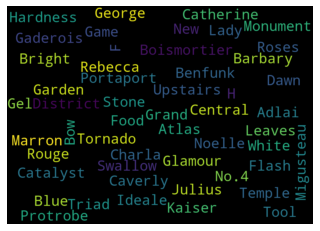

In [1648]:
graph_wordcloud(generate_wordcloud_color_no_ranks(None, characters_tagged_series.value_counts()))

In [1649]:
characters_lowered = list(map(lambda x : x.lower(), characters))
characters_lowered

['george',
 'leotile',
 'kingdom',
 'drouot',
 'everyone',
 'neige',
 'internally',
 'noble',
 'budding',
 'angel',
 'thread',
 'parliament',
 'maximum',
 'zenon',
 'gadjah',
 'fang',
 'afterward',
 'abra',
 'attributes',
 'feathers',
 'soon',
 'nero',
 'elsewhere',
 'château',
 'crushing',
 'vermillions',
 'selena',
 'talos',
 'c',
 'heis',
 'ceremony',
 'seihi',
 'needles',
 'rain',
 'men',
 'yami',
 'fragil',
 'binding',
 'alive',
 'arrow',
 'kingdoms',
 'karen',
 'earth',
 'shield',
 'mereoleona',
 'lab',
 'timed',
 'princess',
 'pappitson',
 'toaru',
 'dark',
 'prickly',
 'noelles',
 'spirit',
 'quintet',
 'lichts',
 'unsworth',
 'solid',
 'guidepost',
 'carl',
 'columna',
 'lightning',
 'phoenix',
 'dagger-folding',
 'entrance',
 'exam',
 'storm',
 'underwater',
 'p',
 'anastasis',
 'lunettes',
 'sea',
 'grimoire',
 'granvorka',
 'litch',
 'shootdown',
 'lagris',
 'paradise',
 'coral',
 'kiten',
 'life',
 'intermediate',
 'leaf',
 'curse',
 'room',
 'mana',
 'lufulu',
 'sitate',


In [1650]:
no_characters_lowered = remove_by_values(tagged_nltk_tokens_lowered, characters_lowered)

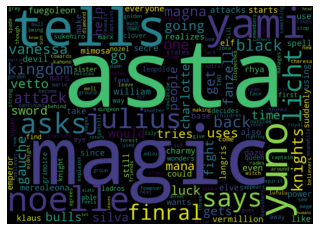

In [1651]:
graph_wordcloud(generate_wordcloud_color(no_characters_lowered, words_as_series_lowered.value_counts()))

In [1652]:
set(map(lambda x: x[1], filter(lambda x : x[0] == "asta", tagged_nltk_tokens_lowered)))

{'CC', 'JJ', 'NN', 'NNP', 'RB', 'VB', 'VBP'}

In [1653]:
set(map(lambda x: x[1], filter(lambda x : x[0] == "Asta", tagged_nltk_tokens)))

{'CC', 'JJ', 'NN', 'NNP', 'RB', 'VB', 'VBP'}

In [1654]:
set(map(lambda x: x[1], filter(lambda x : x[0] == "cannot", tagged_nltk_tokens)))

set()

In [1655]:
tokenize_nltk("cannot")

['can', 'not']

In [1656]:
characters = ["Acier", "Noelle", "Damnatio", "Nozel", "Solid", "Mereleona", "Fuegoleon", "Leopold", "Kirsch", "Mimosa"
                , "Gauche", "Marie", "Rill", "Finral", "Langris", "Gordon", "Lemiel", "Julius", "Yuno", "William", "Klaus", "Theresa"
                , "Charlotte", "Puli", "Sol", "Dorothy", "Jack", "Sekke", "Zora", "Asta", "Charmy", "Luck", "Magna", "Secre", "Grey"
                , "Vanessa", "Henry", "Lily", "Orsi", "Licht", "Fana", "Sally", "Vetto", "Mars", 'Yami', "Kahono", "Kiato", "Xerx", "Zara", "Fanzell"]

In [1657]:
nltk_tokens_lowered_except_characters = list(map(lambda x : x if x in characters else x.lower(), nltk_tokens))
nltk_tokens_lowered_except_characters = list(map(lambda x : "Mereleona" if x == "mereoleona" else x, nltk_tokens_lowered_except_characters))
nltk_tokens_lowered_except_characters

['in',
 'hage',
 ',',
 'a',
 'priest',
 'finds',
 'two',
 'babies',
 'abandoned',
 'outside',
 'his',
 'church',
 '.',
 'he',
 'takes',
 'them',
 'inside',
 'and',
 'discovers',
 'their',
 'names',
 'to',
 'be',
 'Yuno',
 'and',
 'Asta',
 '.',
 'fifteen',
 'years',
 'later',
 ',',
 'Asta',
 'proposes',
 'to',
 'sister',
 'Lily',
 ',',
 'who',
 'refuses',
 'repeatedly',
 '.',
 'Yuno',
 'and',
 'the',
 'other',
 'orphans',
 'criticize',
 'Asta',
 'and',
 'point',
 'out',
 'his',
 'lack',
 'of',
 'magic',
 '.',
 'Asta',
 'tries',
 'to',
 'show',
 'off',
 'his',
 'skills',
 ',',
 'but',
 'Yuno',
 'outshines',
 'him',
 'with',
 'his',
 'magic',
 '.',
 'later',
 ',',
 'at',
 'the',
 'grimoire',
 'acceptance',
 'ceremony',
 ',',
 'a',
 'pair',
 'of',
 'nobles',
 'criticize',
 'the',
 'commoners',
 'there',
 '.',
 'despite',
 'Asta',
 'not',
 'receiving',
 'a',
 'grimoire',
 'while',
 'Yuno',
 'attains',
 'a',
 'four-leaf',
 'clover',
 'one',
 ',',
 'Asta',
 'challenges',
 'Yuno',
 'to',
 'the

In [1658]:
tagged_nltk_tokens_lowered_except_characters = nltk.pos_tag(nltk_tokens_lowered_except_characters)
tagged_nltk_tokens_lowered_except_characters

[('in', 'IN'),
 ('hage', 'NN'),
 (',', ','),
 ('a', 'DT'),
 ('priest', 'JJ'),
 ('finds', 'VBZ'),
 ('two', 'CD'),
 ('babies', 'NNS'),
 ('abandoned', 'VBD'),
 ('outside', 'IN'),
 ('his', 'PRP$'),
 ('church', 'NN'),
 ('.', '.'),
 ('he', 'PRP'),
 ('takes', 'VBZ'),
 ('them', 'PRP'),
 ('inside', 'RB'),
 ('and', 'CC'),
 ('discovers', 'NNS'),
 ('their', 'PRP$'),
 ('names', 'NNS'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('Yuno', 'NNP'),
 ('and', 'CC'),
 ('Asta', 'NNP'),
 ('.', '.'),
 ('fifteen', 'CD'),
 ('years', 'NNS'),
 ('later', 'RB'),
 (',', ','),
 ('Asta', 'NNP'),
 ('proposes', 'VBZ'),
 ('to', 'TO'),
 ('sister', 'VB'),
 ('Lily', 'NNP'),
 (',', ','),
 ('who', 'WP'),
 ('refuses', 'VBZ'),
 ('repeatedly', 'RB'),
 ('.', '.'),
 ('Yuno', 'NNP'),
 ('and', 'CC'),
 ('the', 'DT'),
 ('other', 'JJ'),
 ('orphans', 'NNS'),
 ('criticize', 'VBP'),
 ('Asta', 'NNP'),
 ('and', 'CC'),
 ('point', 'NN'),
 ('out', 'RP'),
 ('his', 'PRP$'),
 ('lack', 'NN'),
 ('of', 'IN'),
 ('magic', 'NN'),
 ('.', '.'),
 ('Asta', 'NNP'),
 (

In [1659]:
words_lowered_except_characters = [token for token in nltk_tokens_lowered_except_characters if token.isalpha() and token not in stoplist]
words_lowered_except_characters

['hage',
 'priest',
 'finds',
 'two',
 'babies',
 'abandoned',
 'outside',
 'church',
 'takes',
 'inside',
 'discovers',
 'names',
 'Yuno',
 'Asta',
 'fifteen',
 'years',
 'later',
 'Asta',
 'proposes',
 'sister',
 'Lily',
 'refuses',
 'repeatedly',
 'Yuno',
 'orphans',
 'criticize',
 'Asta',
 'point',
 'lack',
 'magic',
 'Asta',
 'tries',
 'show',
 'skills',
 'Yuno',
 'outshines',
 'magic',
 'later',
 'grimoire',
 'acceptance',
 'ceremony',
 'pair',
 'nobles',
 'criticize',
 'commoners',
 'despite',
 'Asta',
 'receiving',
 'grimoire',
 'Yuno',
 'attains',
 'clover',
 'one',
 'Asta',
 'challenges',
 'Yuno',
 'title',
 'magic',
 'emperor',
 'Yuno',
 'ignores',
 'ceremony',
 'two',
 'nobles',
 'ambush',
 'Yuno',
 'outside',
 'tower',
 'Yuno',
 'overpowers',
 'three',
 'ambushed',
 'revchi',
 'salik',
 'former',
 'magic',
 'knight',
 'plans',
 'steal',
 'Yuno',
 'grimoire',
 'sell',
 'Asta',
 'comes',
 'Yuno',
 'rescue',
 'fails',
 'revchi',
 'breaks',
 'Asta',
 'spirit',
 'Yuno',
 'calls

In [1660]:
tagged_nltk_tokens_lec_filtered = list(filter(lambda x : x[0] in words_lowered_except_characters, tagged_nltk_tokens_lowered_except_characters))
tagged_nltk_tokens_lec_filtered

[('hage', 'NN'),
 ('priest', 'JJ'),
 ('finds', 'VBZ'),
 ('two', 'CD'),
 ('babies', 'NNS'),
 ('abandoned', 'VBD'),
 ('outside', 'IN'),
 ('church', 'NN'),
 ('takes', 'VBZ'),
 ('inside', 'RB'),
 ('discovers', 'NNS'),
 ('names', 'NNS'),
 ('Yuno', 'NNP'),
 ('Asta', 'NNP'),
 ('fifteen', 'CD'),
 ('years', 'NNS'),
 ('later', 'RB'),
 ('Asta', 'NNP'),
 ('proposes', 'VBZ'),
 ('sister', 'VB'),
 ('Lily', 'NNP'),
 ('refuses', 'VBZ'),
 ('repeatedly', 'RB'),
 ('Yuno', 'NNP'),
 ('orphans', 'NNS'),
 ('criticize', 'VBP'),
 ('Asta', 'NNP'),
 ('point', 'NN'),
 ('lack', 'NN'),
 ('magic', 'NN'),
 ('Asta', 'NNP'),
 ('tries', 'VBZ'),
 ('show', 'VB'),
 ('skills', 'NNS'),
 ('Yuno', 'NNP'),
 ('outshines', 'VBZ'),
 ('magic', 'NN'),
 ('later', 'RB'),
 ('grimoire', 'NN'),
 ('acceptance', 'NN'),
 ('ceremony', 'NN'),
 ('pair', 'NN'),
 ('nobles', 'NNS'),
 ('criticize', 'VBP'),
 ('commoners', 'NNS'),
 ('despite', 'IN'),
 ('Asta', 'NNP'),
 ('receiving', 'VBG'),
 ('grimoire', 'NN'),
 ('Yuno', 'NNP'),
 ('attains', 'VBZ'),


In [1661]:
words_lec_as_series = pd.Series(words_lowered_except_characters)
words_lec_as_series.value_counts()

Asta         1322
magic         966
tells         477
Yami          448
Yuno          407
             ... 
sheer           1
chambers        1
fends           1
appearing       1
verge           1
Length: 5377, dtype: int64

In [1662]:
characters_in_lec = filter_by_tags(tagged_nltk_tokens_lowered_except_characters, ['NNP'])
characters_in_lec

{'Acier',
 'Asta',
 'Charlotte',
 'Charmy',
 'Damnatio',
 'Dorothy',
 'Fana',
 'Fanzell',
 'Finral',
 'Fuegoleon',
 'Gauche',
 'Gordon',
 'Grey',
 'Henry',
 'Jack',
 'Julius',
 'Kahono',
 'Kiato',
 'Kirsch',
 'Klaus',
 'Langris',
 'Lemiel',
 'Leopold',
 'Licht',
 'Lily',
 'Luck',
 'Magna',
 'Marie',
 'Mars',
 'Mereleona',
 'Mimosa',
 'Noelle',
 'Nozel',
 'Orsi',
 'Puli',
 'Rill',
 'Sally',
 'Secre',
 'Sekke',
 'Sol',
 'Solid',
 'Theresa',
 'Vanessa',
 'Vetto',
 'William',
 'Xerx',
 'Yami',
 'Yuno',
 'Zara',
 'Zora',
 'boismortier',
 'kaiser',
 'kill',
 'kira',
 'kruger',
 'magic',
 'marron',
 'undergo',
 'xiii'}

In [1663]:
characters_in_lec_series = pd.Series(list(characters_in_lec))
characters_in_lec_series.value_counts()

Fana           1
Finral         1
Dorothy        1
William        1
kruger         1
Magna          1
Langris        1
Zara           1
Licht          1
Secre          1
Julius         1
Yami           1
Acier          1
Mereleona      1
Vetto          1
Grey           1
undergo        1
Mimosa         1
Orsi           1
Charmy         1
Gauche         1
kill           1
marron         1
kira           1
Theresa        1
Fanzell        1
Kahono         1
Asta           1
Henry          1
Jack           1
Lily           1
Puli           1
Noelle         1
xiii           1
Luck           1
Yuno           1
Charlotte      1
Leopold        1
magic          1
Kirsch         1
Rill           1
Zora           1
Solid          1
Klaus          1
boismortier    1
Gordon         1
Sally          1
Fuegoleon      1
kaiser         1
Vanessa        1
Mars           1
Nozel          1
Marie          1
Lemiel         1
Sekke          1
Xerx           1
Damnatio       1
Kiato          1
Sol           

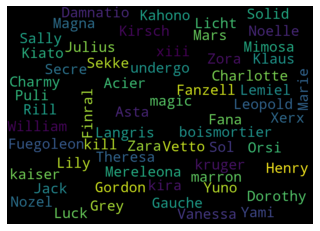

In [1664]:
graph_wordcloud(generate_wordcloud_color_no_ranks(None, characters_in_lec_series.value_counts()))

In [1665]:
characters_in_lec_by_freq = list(filter(lambda x : x in characters, words_lowered_except_characters))
characters_in_lec_by_freq

['Yuno',
 'Asta',
 'Asta',
 'Lily',
 'Yuno',
 'Asta',
 'Asta',
 'Yuno',
 'Asta',
 'Yuno',
 'Asta',
 'Yuno',
 'Yuno',
 'Yuno',
 'Yuno',
 'Yuno',
 'Asta',
 'Yuno',
 'Asta',
 'Yuno',
 'Asta',
 'Asta',
 'Asta',
 'Yuno',
 'Asta',
 'Yuno',
 'Yuno',
 'Asta',
 'Yuno',
 'Asta',
 'Yuno',
 'Asta',
 'Lily',
 'Asta',
 'Lily',
 'Yuno',
 'Lily',
 'Asta',
 'Yuno',
 'Lily',
 'Lily',
 'Yuno',
 'Asta',
 'Yuno',
 'Asta',
 'Yuno',
 'Asta',
 'Asta',
 'Asta',
 'Lily',
 'Asta',
 'Lily',
 'Asta',
 'Asta',
 'Lily',
 'Lily',
 'Asta',
 'Yuno',
 'Asta',
 'Lily',
 'Asta',
 'Lily',
 'Yuno',
 'Asta',
 'Yuno',
 'Asta',
 'Asta',
 'Lily',
 'Asta',
 'Asta',
 'Orsi',
 'Asta',
 'Orsi',
 'Yuno',
 'Asta',
 'Yuno',
 'Yuno',
 'Yuno',
 'Asta',
 'Yuno',
 'Yuno',
 'Asta',
 'Asta',
 'Asta',
 'Yuno',
 'Asta',
 'Asta',
 'Yuno',
 'Asta',
 'Asta',
 'Asta',
 'Asta',
 'Yuno',
 'Asta',
 'Yuno',
 'Lily',
 'Orsi',
 'Asta',
 'Yuno',
 'Yuno',
 'Asta',
 'Asta',
 'Lily',
 'Orsi',
 'Lily',
 'Yuno',
 'Asta',
 'Yuno',
 'Asta',
 'Asta',
 'Yami',
 

In [1666]:
characters_in_lec_by_freq_as_series = pd.Series(characters_in_lec_by_freq)
characters_in_lec_by_freq_as_series.value_counts()

Asta         1322
Yami          448
Yuno          407
Noelle        399
Julius        257
Licht         220
Finral        207
Magna         161
Vanessa       161
Gauche        142
Fanzell       137
Vetto         127
Luck          117
Charlotte     112
Fuegoleon     109
William       108
Klaus          98
Mimosa         95
Charmy         93
Mereleona      92
Mars           90
Secre          87
Langris        83
Leopold        81
Fana           79
Nozel          77
Kahono         63
Gordon         58
Zora           57
Marie          54
Sekke          51
Lily           51
Jack           49
Sol            47
Theresa        47
Grey           43
Kiato          40
Sally          37
Xerx           33
Kirsch         30
Orsi           28
Damnatio       27
Rill           26
Zara           17
Henry          13
Puli           11
Dorothy        10
Solid           9
Lemiel          9
Acier           6
dtype: int64

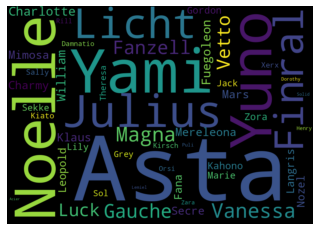

In [1667]:
graph_wordcloud(generate_wordcloud_color(None, characters_in_lec_by_freq_as_series.value_counts()))

In [1668]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

#### Adjetives in Corpus

In [1669]:
adjectives_in_lec_tagged = list(filter(lambda x : any(x[1] == i for i in ['JJ', 'JJR', 'JJS']), tagged_nltk_tokens_lec_filtered))
adjectives_in_lec_tagged

[('priest', 'JJ'),
 ('magic', 'JJ'),
 ('former', 'JJ'),
 ('revchi', 'JJ'),
 ('large', 'JJ'),
 ('okay', 'JJ'),
 ('okay', 'JJ'),
 ('top', 'JJ'),
 ('possible', 'JJ'),
 ('magic', 'JJ'),
 ('brave', 'JJ'),
 ('frightened', 'JJ'),
 ('inspired', 'JJ'),
 ('magic', 'JJ'),
 ('giant', 'JJ'),
 ('magic', 'JJ'),
 ('important', 'JJ'),
 ('important', 'JJ'),
 ('magic', 'JJ'),
 ('surprised', 'JJ'),
 ('magic', 'JJ'),
 ('magic', 'JJ'),
 ('different', 'JJ'),
 ('nash', 'JJ'),
 ('magic', 'JJ'),
 ('nash', 'JJ'),
 ('rough', 'JJ'),
 ('able', 'JJ'),
 ('surprised', 'JJ'),
 ('magic', 'JJ'),
 ('weak', 'JJ'),
 ('present', 'JJ'),
 ('revchi', 'JJ'),
 ('magic', 'JJ'),
 ('unconscious', 'JJ'),
 ('magic', 'JJ'),
 ('giant', 'JJ'),
 ('first', 'JJ'),
 ('following', 'JJ'),
 ('magic', 'JJ'),
 ('magic', 'JJ'),
 ('moguro', 'JJ'),
 ('magic', 'JJ'),
 ('sister', 'JJ'),
 ('nash', 'JJ'),
 ('next', 'JJ'),
 ('nash', 'JJ'),
 ('weak', 'JJ'),
 ('poor', 'JJ'),
 ('magic', 'JJ'),
 ('special', 'JJ'),
 ('various', 'JJ'),
 ('boys', 'JJ'),
 ('inju

In [1670]:
adjectives_in_lec = list(map(lambda x : x[0], adjectives_in_lec_tagged))
adjectives_in_lec = list(filter(lambda x : x not in characters, adjectives_in_lec))
adjectives_in_lec

['priest',
 'magic',
 'former',
 'revchi',
 'large',
 'okay',
 'okay',
 'top',
 'possible',
 'magic',
 'brave',
 'frightened',
 'inspired',
 'magic',
 'giant',
 'magic',
 'important',
 'important',
 'magic',
 'surprised',
 'magic',
 'magic',
 'different',
 'nash',
 'magic',
 'nash',
 'rough',
 'able',
 'surprised',
 'magic',
 'weak',
 'present',
 'revchi',
 'magic',
 'unconscious',
 'magic',
 'giant',
 'first',
 'following',
 'magic',
 'magic',
 'moguro',
 'magic',
 'sister',
 'nash',
 'next',
 'nash',
 'weak',
 'poor',
 'magic',
 'special',
 'various',
 'boys',
 'injured',
 'long',
 'royal',
 'boys',
 'magic',
 'less',
 'magic',
 'swarm',
 'black',
 'green',
 'gueldre',
 'coral',
 'golden',
 'various',
 'great',
 'final',
 'weak',
 'single',
 'magic',
 'magic',
 'crowd',
 'delusional',
 'salim',
 'salim',
 'powerful',
 'able',
 'exam',
 'golden',
 'magical',
 'many',
 'magic',
 'black',
 'poisonous',
 'black',
 'golden',
 'black',
 'busy',
 'sukehiro',
 'ritual',
 'final',
 'black',
 

In [1671]:
adjectives_in_lec_as_series = pd.Series(adjectives_in_lec)
adjectives_in_lec_as_series.value_counts()

magic         418
black         190
able           81
golden         58
new            52
             ... 
forgive         1
uncertain       1
unprepared      1
lacking         1
spectral        1
Length: 893, dtype: int64

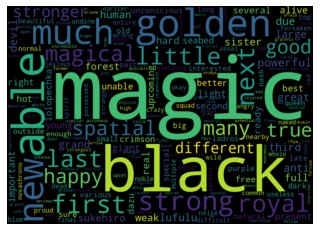

In [1672]:
graph_wordcloud(generate_wordcloud_color(None, adjectives_in_lec_as_series.value_counts()))

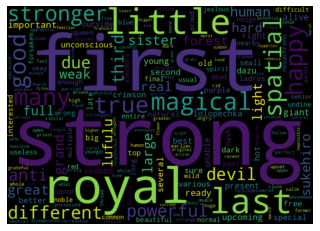

In [1673]:
adjectives_in_lec = list(filter(lambda x : x not in ['golden', 'black', 'magic', 'able', 'new', 'much', 'next'], adjectives_in_lec))
adjectives_in_lec_as_series = pd.Series(adjectives_in_lec)
graph_wordcloud(generate_wordcloud_color(None, adjectives_in_lec_as_series.value_counts()))

### Lemmatizing

#### Verbs in Corpus

##### Non-Lemmatized

In [1674]:
verbs_in_lec_tagged = list(filter(lambda x : any(x[1] == i for i in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']), tagged_nltk_tokens_lec_filtered))
verbs_in_lec_tagged

[('finds', 'VBZ'),
 ('abandoned', 'VBD'),
 ('takes', 'VBZ'),
 ('proposes', 'VBZ'),
 ('sister', 'VB'),
 ('refuses', 'VBZ'),
 ('criticize', 'VBP'),
 ('tries', 'VBZ'),
 ('show', 'VB'),
 ('outshines', 'VBZ'),
 ('criticize', 'VBP'),
 ('receiving', 'VBG'),
 ('attains', 'VBZ'),
 ('challenges', 'VBZ'),
 ('ignores', 'VBZ'),
 ('overpowers', 'VBZ'),
 ('ambushed', 'VBN'),
 ('plans', 'VBZ'),
 ('steal', 'VB'),
 ('sell', 'VB'),
 ('comes', 'VBZ'),
 ('fails', 'VBZ'),
 ('calls', 'VBZ'),
 ('motivated', 'VBN'),
 ('decides', 'VBZ'),
 ('keep', 'VB'),
 ('summons', 'VBZ'),
 ('revchi', 'VB'),
 ('appears', 'VBZ'),
 ('grabs', 'VBD'),
 ('appears', 'VBZ'),
 ('running', 'VBG'),
 ('fell', 'VBD'),
 ('asked', 'VBD'),
 ('came', 'VBD'),
 ('grab', 'VB'),
 ('get', 'VB'),
 ('called', 'VBD'),
 ('told', 'VBD'),
 ('got', 'VBD'),
 ('kept', 'VBD'),
 ('running', 'VBG'),
 ('holding', 'VBG'),
 ('commented', 'VBD'),
 ('waiting', 'VBG'),
 ('started', 'VBD'),
 ('making', 'VBG'),
 ('wanted', 'VBD'),
 ('marry', 'VB'),
 ('explained', 'V

In [1675]:
verbs_in_lec = list(map(lambda x : x[0], verbs_in_lec_tagged))
verbs_in_lec = list(filter(lambda x : x not in characters, verbs_in_lec))
verbs_in_lec

['finds',
 'abandoned',
 'takes',
 'proposes',
 'sister',
 'refuses',
 'criticize',
 'tries',
 'show',
 'outshines',
 'criticize',
 'receiving',
 'attains',
 'challenges',
 'ignores',
 'overpowers',
 'ambushed',
 'plans',
 'steal',
 'sell',
 'comes',
 'fails',
 'calls',
 'motivated',
 'decides',
 'keep',
 'summons',
 'revchi',
 'appears',
 'grabs',
 'appears',
 'running',
 'fell',
 'asked',
 'came',
 'grab',
 'get',
 'called',
 'told',
 'got',
 'kept',
 'running',
 'holding',
 'commented',
 'waiting',
 'started',
 'making',
 'wanted',
 'marry',
 'explained',
 'told',
 'finished',
 'marry',
 'smiled',
 'read',
 'came',
 'exist',
 'brought',
 'threatened',
 'destroy',
 'defeated',
 'returning',
 'appeared',
 'ended',
 'seemed',
 'admiring',
 'asked',
 'agreed',
 'added',
 'stood',
 'told',
 'made',
 'become',
 'seemed',
 'proceeded',
 'list',
 'wanted',
 'asked',
 'marry',
 'going',
 'responded',
 'kept',
 'asking',
 'kept',
 'saying',
 'released',
 'practicing',
 'seemed',
 'frustrated'

In [1676]:
verbs_in_lec_as_series = pd.Series(verbs_in_lec)
verbs_in_lec_as_series.value_counts()

tells          426
asks           240
says           225
go             144
get            143
              ... 
paralysed        1
locates          1
supporting       1
specializes      1
fade             1
Length: 2460, dtype: int64

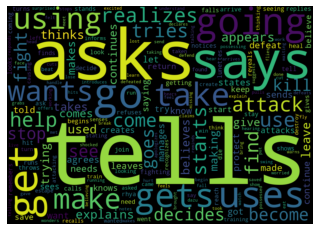

In [1677]:
graph_wordcloud(generate_wordcloud_color(None, verbs_in_lec_as_series.value_counts()))

##### Lemmatized

In [1678]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /home/pauli/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/pauli/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [1679]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
lemmas_lec = []
lemmas_lec_filtered = []
for token in nltk_tokens_lowered_except_characters: 
  if token in characters:
    lemmas_lec.append(token)
    lemmas_lec_filtered.append(token)
  else:
    if token.isalpha() and token not in stoplist:
      lemmas_lec_filtered.append(lemmatizer.lemmatize(token))
    lemmas_lec.append(lemmatizer.lemmatize(token))
lemmas_lec

['in',
 'hage',
 ',',
 'a',
 'priest',
 'find',
 'two',
 'baby',
 'abandoned',
 'outside',
 'his',
 'church',
 '.',
 'he',
 'take',
 'them',
 'inside',
 'and',
 'discovers',
 'their',
 'name',
 'to',
 'be',
 'Yuno',
 'and',
 'Asta',
 '.',
 'fifteen',
 'year',
 'later',
 ',',
 'Asta',
 'proposes',
 'to',
 'sister',
 'Lily',
 ',',
 'who',
 'refuse',
 'repeatedly',
 '.',
 'Yuno',
 'and',
 'the',
 'other',
 'orphan',
 'criticize',
 'Asta',
 'and',
 'point',
 'out',
 'his',
 'lack',
 'of',
 'magic',
 '.',
 'Asta',
 'try',
 'to',
 'show',
 'off',
 'his',
 'skill',
 ',',
 'but',
 'Yuno',
 'outshines',
 'him',
 'with',
 'his',
 'magic',
 '.',
 'later',
 ',',
 'at',
 'the',
 'grimoire',
 'acceptance',
 'ceremony',
 ',',
 'a',
 'pair',
 'of',
 'noble',
 'criticize',
 'the',
 'commoner',
 'there',
 '.',
 'despite',
 'Asta',
 'not',
 'receiving',
 'a',
 'grimoire',
 'while',
 'Yuno',
 'attains',
 'a',
 'four-leaf',
 'clover',
 'one',
 ',',
 'Asta',
 'challenge',
 'Yuno',
 'to',
 'the',
 'title',
 

In [1680]:
lemmas_lec_filtered

['hage',
 'priest',
 'find',
 'two',
 'baby',
 'abandoned',
 'outside',
 'church',
 'take',
 'inside',
 'discovers',
 'name',
 'Yuno',
 'Asta',
 'fifteen',
 'year',
 'later',
 'Asta',
 'proposes',
 'sister',
 'Lily',
 'refuse',
 'repeatedly',
 'Yuno',
 'orphan',
 'criticize',
 'Asta',
 'point',
 'lack',
 'magic',
 'Asta',
 'try',
 'show',
 'skill',
 'Yuno',
 'outshines',
 'magic',
 'later',
 'grimoire',
 'acceptance',
 'ceremony',
 'pair',
 'noble',
 'criticize',
 'commoner',
 'despite',
 'Asta',
 'receiving',
 'grimoire',
 'Yuno',
 'attains',
 'clover',
 'one',
 'Asta',
 'challenge',
 'Yuno',
 'title',
 'magic',
 'emperor',
 'Yuno',
 'ignores',
 'ceremony',
 'two',
 'noble',
 'ambush',
 'Yuno',
 'outside',
 'tower',
 'Yuno',
 'overpowers',
 'three',
 'ambushed',
 'revchi',
 'salik',
 'former',
 'magic',
 'knight',
 'plan',
 'steal',
 'Yuno',
 'grimoire',
 'sell',
 'Asta',
 'come',
 'Yuno',
 'rescue',
 'fails',
 'revchi',
 'break',
 'Asta',
 'spirit',
 'Yuno',
 'call',
 'Asta',
 'rival

In [1681]:
tagged_lemmas_lec = nltk.pos_tag(lemmas_lec)
tagged_lemmas_lec

[('in', 'IN'),
 ('hage', 'NN'),
 (',', ','),
 ('a', 'DT'),
 ('priest', 'JJ'),
 ('find', 'NN'),
 ('two', 'CD'),
 ('baby', 'NN'),
 ('abandoned', 'VBD'),
 ('outside', 'IN'),
 ('his', 'PRP$'),
 ('church', 'NN'),
 ('.', '.'),
 ('he', 'PRP'),
 ('take', 'VB'),
 ('them', 'PRP'),
 ('inside', 'RB'),
 ('and', 'CC'),
 ('discovers', 'VBZ'),
 ('their', 'PRP$'),
 ('name', 'NN'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('Yuno', 'NNP'),
 ('and', 'CC'),
 ('Asta', 'NNP'),
 ('.', '.'),
 ('fifteen', 'JJ'),
 ('year', 'NN'),
 ('later', 'RB'),
 (',', ','),
 ('Asta', 'NNP'),
 ('proposes', 'VBZ'),
 ('to', 'TO'),
 ('sister', 'VB'),
 ('Lily', 'NNP'),
 (',', ','),
 ('who', 'WP'),
 ('refuse', 'VBP'),
 ('repeatedly', 'RB'),
 ('.', '.'),
 ('Yuno', 'NNP'),
 ('and', 'CC'),
 ('the', 'DT'),
 ('other', 'JJ'),
 ('orphan', 'JJ'),
 ('criticize', 'VB'),
 ('Asta', 'NNP'),
 ('and', 'CC'),
 ('point', 'NN'),
 ('out', 'RP'),
 ('his', 'PRP$'),
 ('lack', 'NN'),
 ('of', 'IN'),
 ('magic', 'NN'),
 ('.', '.'),
 ('Asta', 'NNP'),
 ('try', 'NN'),
 

In [1682]:
tagged_lemmas_lec_filtered = list(filter(lambda x : x[0] in lemmas_lec_filtered, tagged_lemmas_lec))
tagged_lemmas_lec_filtered

[('hage', 'NN'),
 ('priest', 'JJ'),
 ('find', 'NN'),
 ('two', 'CD'),
 ('baby', 'NN'),
 ('abandoned', 'VBD'),
 ('outside', 'IN'),
 ('church', 'NN'),
 ('take', 'VB'),
 ('inside', 'RB'),
 ('discovers', 'VBZ'),
 ('name', 'NN'),
 ('Yuno', 'NNP'),
 ('Asta', 'NNP'),
 ('fifteen', 'JJ'),
 ('year', 'NN'),
 ('later', 'RB'),
 ('Asta', 'NNP'),
 ('proposes', 'VBZ'),
 ('sister', 'VB'),
 ('Lily', 'NNP'),
 ('refuse', 'VBP'),
 ('repeatedly', 'RB'),
 ('Yuno', 'NNP'),
 ('orphan', 'JJ'),
 ('criticize', 'VB'),
 ('Asta', 'NNP'),
 ('point', 'NN'),
 ('lack', 'NN'),
 ('magic', 'NN'),
 ('Asta', 'NNP'),
 ('try', 'NN'),
 ('show', 'VB'),
 ('skill', 'NN'),
 ('Yuno', 'NNP'),
 ('outshines', 'VBZ'),
 ('magic', 'NN'),
 ('later', 'RB'),
 ('grimoire', 'NN'),
 ('acceptance', 'NN'),
 ('ceremony', 'NN'),
 ('pair', 'NN'),
 ('noble', 'JJ'),
 ('criticize', 'VB'),
 ('commoner', 'NN'),
 ('despite', 'IN'),
 ('Asta', 'NNP'),
 ('receiving', 'VBG'),
 ('grimoire', 'NN'),
 ('Yuno', 'NNP'),
 ('attains', 'VBZ'),
 ('clover', 'NN'),
 ('one

In [1683]:
lemmas_lec_filtered_as_series = pd.Series(lemmas_lec_filtered)
lemmas_lec_filtered_as_series.value_counts()

Asta          1322
magic          966
tell           510
Yami           448
Yuno           407
              ... 
loudly           1
desk             1
concluding       1
drill            1
verge            1
Length: 4726, dtype: int64

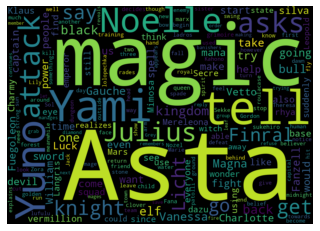

In [1684]:
graph_wordcloud(generate_wordcloud_color(None, lemmas_lec_filtered_as_series.value_counts()))

In [1685]:
verbs_in_lec_tagged = list(filter(lambda x : any(x[1] == i for i in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']), tagged_lemmas_lec_filtered))
verbs_in_lec_tagged

[('abandoned', 'VBD'),
 ('take', 'VB'),
 ('discovers', 'VBZ'),
 ('proposes', 'VBZ'),
 ('sister', 'VB'),
 ('refuse', 'VBP'),
 ('criticize', 'VB'),
 ('show', 'VB'),
 ('outshines', 'VBZ'),
 ('criticize', 'VB'),
 ('receiving', 'VBG'),
 ('attains', 'VBZ'),
 ('ignores', 'VBZ'),
 ('overpowers', 'VBZ'),
 ('ambushed', 'VBN'),
 ('plan', 'VBP'),
 ('steal', 'VB'),
 ('sell', 'VB'),
 ('come', 'VBP'),
 ('fails', 'VBZ'),
 ('motivated', 'VBN'),
 ('decides', 'VBZ'),
 ('keep', 'VB'),
 ('summons', 'VBZ'),
 ('revchi', 'VB'),
 ('appears', 'VBZ'),
 ('grab', 'VBP'),
 ('appears', 'VBZ'),
 ('running', 'VBG'),
 ('fell', 'VBD'),
 ('asked', 'VBD'),
 ('came', 'VBD'),
 ('grab', 'VB'),
 ('get', 'VB'),
 ('called', 'VBD'),
 ('told', 'VBD'),
 ('got', 'VBD'),
 ('kept', 'VBD'),
 ('running', 'VBG'),
 ('holding', 'VBG'),
 ('commented', 'VBD'),
 ('waiting', 'VBG'),
 ('started', 'VBD'),
 ('making', 'VBG'),
 ('wanted', 'VBD'),
 ('marry', 'VB'),
 ('explained', 'VBD'),
 ('told', 'VBD'),
 ('finished', 'VBN'),
 ('marry', 'VB'),
 (

In [1686]:
verbs_in_lec = list(map(lambda x : x[0], verbs_in_lec_tagged))
verbs_in_lec = list(filter(lambda x : x not in characters, verbs_in_lec))
verbs_in_lec

['abandoned',
 'take',
 'discovers',
 'proposes',
 'sister',
 'refuse',
 'criticize',
 'show',
 'outshines',
 'criticize',
 'receiving',
 'attains',
 'ignores',
 'overpowers',
 'ambushed',
 'plan',
 'steal',
 'sell',
 'come',
 'fails',
 'motivated',
 'decides',
 'keep',
 'summons',
 'revchi',
 'appears',
 'grab',
 'appears',
 'running',
 'fell',
 'asked',
 'came',
 'grab',
 'get',
 'called',
 'told',
 'got',
 'kept',
 'running',
 'holding',
 'commented',
 'waiting',
 'started',
 'making',
 'wanted',
 'marry',
 'explained',
 'told',
 'finished',
 'marry',
 'smiled',
 'read',
 'came',
 'exist',
 'brought',
 'threatened',
 'destroy',
 'defeated',
 'returning',
 'appeared',
 'ended',
 'seemed',
 'admiring',
 'asked',
 'agreed',
 'added',
 'stood',
 'told',
 'made',
 'become',
 'seemed',
 'proceeded',
 'list',
 'wanted',
 'asked',
 'marry',
 'going',
 'responded',
 'kept',
 'asking',
 'kept',
 'saying',
 'released',
 'practicing',
 'seemed',
 'frustrated',
 'use',
 'passed',
 'carrying',
 '

In [1687]:
verbs_in_lec_as_series = pd.Series(verbs_in_lec)
dict(verbs_in_lec_as_series.value_counts())

{'tell': 462,
 'say': 246,
 'asks': 242,
 'get': 223,
 'go': 206,
 'take': 141,
 'going': 137,
 'make': 121,
 'want': 116,
 'attack': 102,
 'see': 99,
 'come': 97,
 'find': 89,
 'using': 88,
 'realizes': 82,
 'help': 81,
 'think': 80,
 'use': 78,
 'know': 75,
 'stop': 73,
 'fight': 65,
 'start': 64,
 'decides': 64,
 'kill': 64,
 'become': 63,
 'try': 61,
 'give': 58,
 'wonder': 55,
 'appears': 55,
 'explains': 52,
 'leave': 52,
 'defeat': 51,
 'hit': 51,
 'used': 50,
 'trying': 45,
 'run': 45,
 'look': 44,
 'let': 43,
 'continues': 42,
 'making': 42,
 'cut': 41,
 'save': 41,
 'turn': 40,
 'keep': 40,
 'agrees': 40,
 'feel': 39,
 'manages': 39,
 'told': 39,
 'need': 39,
 'show': 38,
 'saying': 37,
 'made': 37,
 'got': 37,
 'creates': 36,
 'continue': 36,
 'sends': 36,
 'protect': 35,
 'fighting': 33,
 'believe': 33,
 'getting': 33,
 'return': 33,
 'reach': 32,
 'fly': 32,
 'throw': 30,
 'put': 30,
 'swing': 30,
 'stand': 30,
 'seeing': 30,
 'grab': 30,
 'knight': 29,
 'die': 27,
 'join'

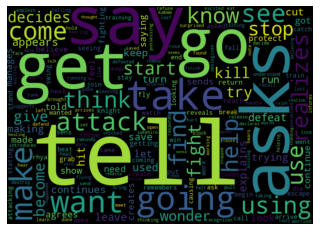

In [1688]:
graph_wordcloud(generate_wordcloud_color(None, verbs_in_lec_as_series.value_counts()))

In [1689]:
bad_verbs = ['say', 'asks', 'ask', 'tell', 'get', 'go', 'going', 'come', 'take', 'make', 'see']

In [1690]:
verbs_in_lec = list(map(lambda x : x[0], verbs_in_lec_tagged))
verbs_in_lec = list(filter(lambda x : x not in bad_verbs, verbs_in_lec))
verbs_in_lec

['abandoned',
 'discovers',
 'proposes',
 'sister',
 'refuse',
 'criticize',
 'show',
 'outshines',
 'criticize',
 'receiving',
 'attains',
 'ignores',
 'overpowers',
 'ambushed',
 'plan',
 'steal',
 'sell',
 'fails',
 'motivated',
 'decides',
 'keep',
 'summons',
 'revchi',
 'appears',
 'grab',
 'appears',
 'running',
 'fell',
 'asked',
 'came',
 'grab',
 'called',
 'told',
 'got',
 'kept',
 'running',
 'holding',
 'commented',
 'waiting',
 'started',
 'making',
 'wanted',
 'marry',
 'explained',
 'told',
 'finished',
 'marry',
 'smiled',
 'read',
 'came',
 'exist',
 'brought',
 'threatened',
 'destroy',
 'defeated',
 'returning',
 'appeared',
 'ended',
 'seemed',
 'admiring',
 'asked',
 'agreed',
 'added',
 'stood',
 'told',
 'made',
 'become',
 'seemed',
 'proceeded',
 'list',
 'wanted',
 'asked',
 'marry',
 'responded',
 'kept',
 'asking',
 'kept',
 'saying',
 'Yuno',
 'released',
 'practicing',
 'seemed',
 'frustrated',
 'use',
 'passed',
 'carrying',
 'told',
 'help',
 'thanked',

In [1691]:
verbs_in_lec_as_series = pd.Series(verbs_in_lec)
dict(verbs_in_lec_as_series.value_counts())

{'want': 116,
 'attack': 102,
 'find': 89,
 'using': 88,
 'realizes': 82,
 'help': 81,
 'think': 80,
 'use': 78,
 'know': 75,
 'stop': 73,
 'fight': 65,
 'decides': 64,
 'start': 64,
 'kill': 64,
 'become': 63,
 'try': 61,
 'give': 58,
 'appears': 55,
 'wonder': 55,
 'explains': 52,
 'leave': 52,
 'hit': 51,
 'defeat': 51,
 'used': 50,
 'run': 45,
 'trying': 45,
 'look': 44,
 'let': 43,
 'making': 42,
 'continues': 42,
 'save': 41,
 'cut': 41,
 'agrees': 40,
 'keep': 40,
 'turn': 40,
 'need': 39,
 'feel': 39,
 'told': 39,
 'manages': 39,
 'show': 38,
 'saying': 37,
 'got': 37,
 'made': 37,
 'sends': 36,
 'continue': 36,
 'creates': 36,
 'protect': 35,
 'return': 33,
 'getting': 33,
 'believe': 33,
 'fighting': 33,
 'fly': 32,
 'reach': 32,
 'swing': 30,
 'seeing': 30,
 'put': 30,
 'grab': 30,
 'stand': 30,
 'throw': 30,
 'knight': 29,
 'begin': 27,
 'join': 27,
 'die': 27,
 'break': 27,
 'escape': 27,
 'beat': 26,
 'reveals': 25,
 'rhya': 25,
 'catch': 25,
 'went': 25,
 'call': 24,
 's

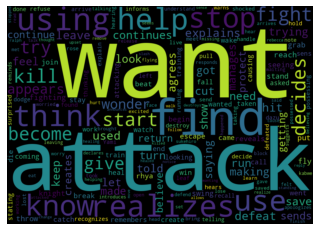

In [1692]:
graph_wordcloud(generate_wordcloud_color(None, verbs_in_lec_as_series.value_counts()))

In [1693]:
adjectives_in_lec_tagged = list(filter(lambda x : any(x[1] == i for i in ['JJ', 'JJR', 'JJS']), tagged_lemmas_lec_filtered))
adjectives_in_lec_tagged

[('priest', 'JJ'),
 ('fifteen', 'JJ'),
 ('orphan', 'JJ'),
 ('noble', 'JJ'),
 ('magic', 'JJ'),
 ('noble', 'JJ'),
 ('former', 'JJ'),
 ('revchi', 'JJ'),
 ('large', 'JJ'),
 ('okay', 'JJ'),
 ('okay', 'JJ'),
 ('top', 'JJ'),
 ('possible', 'JJ'),
 ('magic', 'JJ'),
 ('brave', 'JJ'),
 ('frightened', 'JJ'),
 ('inspired', 'JJ'),
 ('magic', 'JJ'),
 ('giant', 'JJ'),
 ('magic', 'JJ'),
 ('important', 'JJ'),
 ('important', 'JJ'),
 ('magic', 'JJ'),
 ('surprised', 'JJ'),
 ('magic', 'JJ'),
 ('magic', 'JJ'),
 ('different', 'JJ'),
 ('nash', 'JJ'),
 ('magic', 'JJ'),
 ('nash', 'JJ'),
 ('rough', 'JJ'),
 ('able', 'JJ'),
 ('surprised', 'JJ'),
 ('magic', 'JJ'),
 ('weak', 'JJ'),
 ('present', 'JJ'),
 ('revchi', 'JJ'),
 ('magic', 'JJ'),
 ('unconscious', 'JJ'),
 ('magic', 'JJ'),
 ('giant', 'JJ'),
 ('first', 'JJ'),
 ('following', 'JJ'),
 ('magic', 'JJ'),
 ('magic', 'JJ'),
 ('moguro', 'JJ'),
 ('magic', 'JJ'),
 ('sister', 'JJ'),
 ('foster', 'JJ'),
 ('nash', 'JJ'),
 ('next', 'JJ'),
 ('nash', 'JJ'),
 ('weak', 'JJ'),
 ('po

In [1694]:
bad_adjectives = ['golden', 'black', 'magic', 'able', 'new', 'much', 'next']

In [1695]:
adjectives_in_lec = list(map(lambda x : x[0], adjectives_in_lec_tagged))
adjectives_in_lec = list(filter(lambda x : x not in characters, adjectives_in_lec))
adjectives_in_lec = list(filter(lambda x : x not in bad_adjectives, adjectives_in_lec))
adjectives_in_lec

['priest',
 'fifteen',
 'orphan',
 'noble',
 'noble',
 'former',
 'revchi',
 'large',
 'okay',
 'okay',
 'top',
 'possible',
 'brave',
 'frightened',
 'inspired',
 'giant',
 'important',
 'important',
 'surprised',
 'different',
 'nash',
 'nash',
 'rough',
 'surprised',
 'weak',
 'present',
 'revchi',
 'unconscious',
 'giant',
 'first',
 'following',
 'moguro',
 'sister',
 'foster',
 'nash',
 'nash',
 'weak',
 'poor',
 'special',
 'various',
 'tato',
 'boy',
 'injured',
 'long',
 'royal',
 'boy',
 'le',
 'swarm',
 'green',
 'gueldre',
 'coral',
 'various',
 'great',
 'final',
 'weak',
 'single',
 'delusional',
 'contestant',
 'salim',
 'powerful',
 'exam',
 'magical',
 'many',
 'poisonous',
 'welcome',
 'busy',
 'ritual',
 'final',
 'impressed',
 'excited',
 'royal',
 'insect',
 'equal',
 'wrong',
 'upset',
 'afraid',
 'giant',
 'free',
 'strong',
 'magical',
 'squad',
 'clean',
 'fair',
 'handle',
 'ideal',
 'personal',
 'seihi',
 'first',
 'wild',
 'magical',
 'crazy',
 'several',
 '

In [1696]:
adjectives_in_lec_as_series = pd.Series(adjectives_in_lec)
adjectives_in_lec_as_series.value_counts()

strong      45
human       41
first       40
little      36
last        34
            ..
origin       1
wicked       1
distant      1
monument     1
dormant      1
Length: 972, dtype: int64

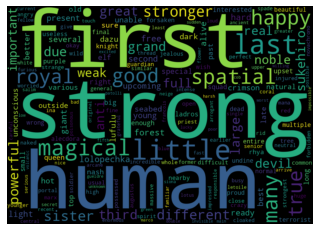

In [1697]:
graph_wordcloud(generate_wordcloud_color(None, adjectives_in_lec_as_series.value_counts()))

In [1698]:
def write_json(to_json, filename):
    json_object = json.dumps(to_json)

    with open(filename, "w") as outfile:
        outfile.write(json_object)

In [1699]:
write_json(characters,          "2_characters_black_clover.json")
write_json(bad_verbs,           "2_bad_verbs_black_clover.json")
write_json(bad_adjectives,      "2_bad_adjectives_black_clover.json")
write_json(lemmas_lec_filtered, "2_lemmatized_filtered_black_clover.json")
write_json(adjectives_in_lec,   "2_adjectives_black_clover.json")
write_json(verbs_in_lec,        "2_verbs_black_clover.json")